#Data Science Final Project
###By: Ryan Napolitano, Will Moran, Seif Ingram

# Business Understanding
In the modern era of the NBA, the trend of high-scoring offense has become a staple of the game. Today, teams use a variety of strategies to score points, from fast-paced drives to the basket to long-range three-pointers. Teams like the Golden State Warriors and Houston Rockets have been able to dominate the league by utilizing their offensive talents. The Warriors, for example, broke the record for the most three-pointers in a single season, while the Rockets have used their potent long-range shooting to become one of the most prolific scoring teams in the league. Point scoring and offense are vital to success in the NBA, and the teams that utilize these skills to their advantage are generally the ones that win titles. By focusing on offensive basketball, teams can generate points and build a strong foundation of success. Furthermore, as the NBA continues to evolve, so too must the strategies and skills of its teams, making point scoring and offense essential components of winning basketball.

The offensive rating of an NBA team is a measure of their overall offensive production. This rating takes into account the quality of the shots taken, the pace of the game, the offensive efficiency, and other factors. By examining an NBA team's offensive rating, one can gain an understanding of how well they are producing on the offensive end. As such, the offensive rating of a team can have a substantial effect on the team's overall winning percentage. When teams have a higher offensive rating, they tend to score more points and win more games. Teams with a higher offensive rating also tend to have a better field goal percentage, which gives them an edge in close games. It also helps them spread the defense out, creating more scoring opportunities. Ultimately, having a higher offensive rating allows teams to outscore their opponents more often, resulting in an improved win-loss record. On the other hand, teams with a lower offensive rating tend to struggle more in close games and lack the necessary scoring output to pull out a victory.  Low offensive ratings can also make it more difficult for teams to establish a consistent offensive identity, leading to less effective offensive execution.  Overall, the offensive rating of an NBA team has a significant impact on their winning percentage. Thus, it is essential for teams to strive for an optimal offensive rating in order to maximize their chances of victory.

This project places a focus on analyzing the relationship between teams' offensive ratings and defensive ratings and their win-loss percentage. Regressing these two variables will reveal if highly offensive teams do in fact see more success in the NBA. By reseacrhing the effects of defensive rating on win-loss percentage, we will be able to further confirm our hypothesis that the NBA has become more centered around offensive success. 



#Data Understanding

Our data came from Basketball Reference, which is a website that contains massive database of statistics from the NBA (formerly the ABA), G-League, NBL ,international leagues, and WNBA. We utilized their database to access team statistics for the seasons of 2001-2002 through 2021-2022.

**Our Variables:**

Rk -- Rank

WIN -- Wins

LOSS -- Losses

W/L% -- Win-Loss Percentage (This will be our dependent variabel)

MARGIN -- Margin of Victory

OFFR -- Offensive Rating -- 
An estimate of points produced (players) or scored (teams) per 100 possessions

DEFR -- Defensive Rating -- 
An estimate of points allowed per 100 possessions

NETR -- Net Rating; an estimate of point differential per 100 possessions.

MOV/A -- Adjusted Margin of Victory; margin of victory adjusted for strength of opponent.

ORtg/A -- Adjusted Offensive Rating -- 
An estimate of points scored per 100 possessions adjusted for strength of opponent defense.

DRtg/A -- Adjusted Defensive Rating -- 
An estimate of points allowed per 100 possessions adjusted for strength of opponent offense.

NRtg/A -- Adjusted Net Rating; an estimate of point differential per 100 possessions adjusted for strength of opponent.


https://www.basketball-reference.com/

#Data Preperation

To prep for our project, we used every teams' wins, losses, Offensive rating, defensive ratins, and W/l ratio for 20 years.  We ended up with 626 different data points for all given variables.

#Exploratory Data Analysis

In [ ]:
#Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#clone the github repository
Use_Google_Drive= False #@param {type:"boolean"}

if Use_Google_Drive:
    import os
    from google.colab import drive 

    drive.mount('/content/gdrive',force_remount=True)

    Working_Directory = 'My Drive/Final_Proj_Nap_Ing_Mor' #@param {type:"string"}
    wd="/content/gdrive/"+Working_Directory
    os.chdir(wd)

    !git clone https://github.com/nappy345/nappy345.github.io
    
    %cd DS201.github.io/
    dirpath = os.getcwd()
    print("current directory is : " + dirpath)

    
else:
    !git clone https://github.com/nappy345/nappy345.github.io
    %cd nappy345.github.io

Cloning into 'nappy345.github.io'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 31 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (31/31), done.
/content/gdrive/MyDrive/Final_Proj_Nap_Ing_Mor/nappy345.github.io/nappy345.github.io/nappy345.github.io/nappy345.github.io


In [ ]:
#reading in csv
my_data= pd.read_csv("NBA_Data.csv")
my_data

,Unnamed: 0,RANK,Team,CONFERENCE,DIVISION,WIN,LOSS,W/L%,MARGIN,OFFR,DEFR,NETR,MOV/A,ORtg/A,DRtg/A,NRtg/A
0,2022,1,Phoenix Suns,W,P,64,18,0.780,7.50,115.65,108.17,7.48,6.94,115.41,108.50,6.91
1,2022,2,Memphis Grizzlies,W,SW,56,26,0.683,5.68,115.50,109.94,5.56,5.37,115.38,110.14,5.24
2,2022,3,Golden State Warriors,W,P,53,29,0.646,5.54,113.33,107.68,5.65,5.52,113.24,107.62,5.62
3,2022,4,Miami Heat,E,SE,53,29,0.646,4.45,114.83,110.21,4.62,4.23,114.61,110.21,4.40
4,2022,5,Dallas Mavericks,W,SW,52,30,0.634,3.30,113.82,110.27,3.55,3.12,113.76,110.41,3.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,2002,25,Houston Rockets,W,M,28,54,0.341,-4.89,103.93,109.55,-5.62,-4.31,104.08,109.03,-4.95
623,2002,26,Golden State Warriors,W,P,21,61,0.256,-5.40,103.56,109.28,-5.71,-4.80,103.70,108.74,-5.04
624,2002,27,Denver Nuggets,W,M,27,55,0.329,-5.82,102.34,108.68,-6.35,-5.19,102.44,108.08,-5.64
625,2002,28,Memphis Grizzlies,W,M,23,59,0.280,-7.44,98.90,107.09,-8.19,-6.74,98.92,106.32,-7.40


##Summary Statistics
Looking at the summary statistics, we can see that the average team Offensive Rating is 108.02. The average team Defensive Rating is 108.04. The average win/loss percentage for a team each season is 50% The average amount of wins for a team each season is 40.10. 


In [ ]:
#Summary Statistics
my_data[["OFFR","DEFR","W/L%","WIN"]].describe()

,OFFR,DEFR,W/L%,WIN
count,627.000000,627.000000,627.000000,627.000000
mean,108.029872,108.037368,0.499756,40.103668
std,4.092495,3.891040,0.149308,12.243552
min,93.200000,94.790000,0.106000,7.000000
25%,105.195000,105.340000,0.390000,31.500000
50%,107.660000,108.010000,0.512000,41.000000
75%,111.105000,110.915000,0.610000,49.000000
max,118.910000,118.540000,0.890000,73.000000


##Scatter Plot of Offensive Rating vs. Win/Loss Percentage
Looking at the scatter plot, we can see there is a clearly positive linear relationship. As a team’s Offensive Rating increases, so does the team’s Win/Loss%. 


Text(0, 0.5, 'W/L%')

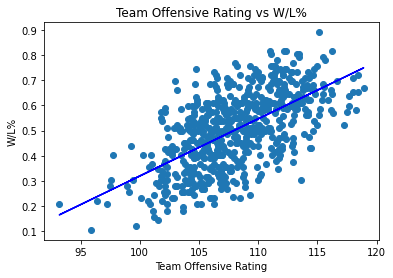

In [ ]:
#Scatter Plots of W/L% in relation to Team Offensive rating
wins = my_data["W/L%"]
OFFR = my_data["OFFR"]

plt.scatter(OFFR, wins)
plt.title('Team Offensive Rating vs W/L%')
plt.xlabel('Team Offensive Rating')
plt.ylabel('W/L%')

##Scatter Plot of Defensive Rating vs. Win/Loss Percentage
Looking at the scatter plot, we can see there is a clearly negative linear relationship. As the team’s Defensive Rating increases, their Win/Loss% Increases.


Text(0, 0.5, 'W/L%')

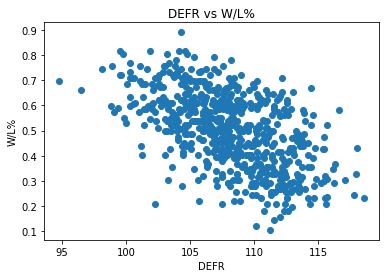

In [ ]:
#Scatter Plot of W/L% in relation to Team Defensive Rating
DEFR = my_data["DEFR"]

plt.scatter(DEFR, wins)

plt.title('DEFR vs W/L%')
plt.xlabel('DEFR')
plt.ylabel('W/L%')

##Comparison of Scatter Plots
Looking at the offensive and defensive metrics next to each other it is apparent that to see that a better offensive team is more likely to win more games. This also includes having a low defensive rating.  A better defense does win more games but at a flatter slope.  Meaning that a higher offensive rating 


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


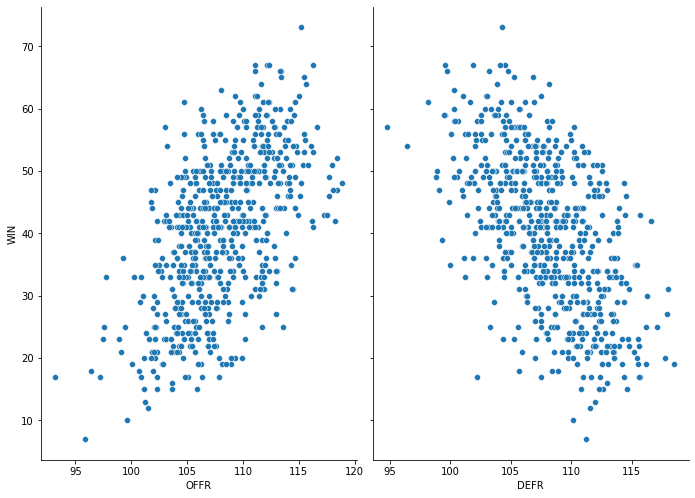

In [ ]:
#Visualize the relationship between the features and the response using scatterplots
sns.pairplot(my_data, x_vars=['OFFR','DEFR'], y_vars='WIN', size=7, aspect=0.7)

#Machine Learning Model and Evaluation

##Linear Regression Model
After running the linear regression model, we found a slope coefficient of 0.02, meaning that for every additional point of team’s offensive rating, a team win/loss% increases by about 2.3%. This regression has a Y-intercept of -1.95. 

When evaluating our model, we used the metric of RMSE. Our RMSE ended up being very small at 0.01 signifying a very small and insignificant deviation in our variance. Meaning we had a good model fit.

In [ ]:
from numpy.ma.core import size
#Simple Linear Regression Model
X = my_data["OFFR"] #get a copy of dataset exclude last column
y = my_data["W/L%"] #get array of dataset in column 1st

#Use only one feature
X = X[:, np.newaxis]

# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

#Run Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regressor.predict(X_test)

# The coefficients
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
print("Coefficients: \n", regressor.coef_)
print("Y-Intercept: \n", regressor.intercept_)
# The mean squared error
print("Root Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [0.02268099]
Y-Intercept: 
 -1.9482172557770767
Root Mean squared error: 0.01
Coefficient of determination: 0.33


<ipython-input-52-156d353aaf46>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:, np.newaxis]


##Training Set Graph

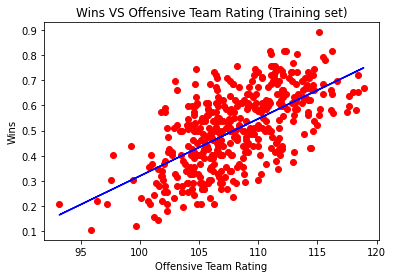

In [ ]:
# Visualizing the Training set results
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Wins VS Offensive Team Rating (Training set)')
plt.xlabel('Offensive Team Rating')
plt.ylabel('Wins')
plt.show()

##Test Set Graph

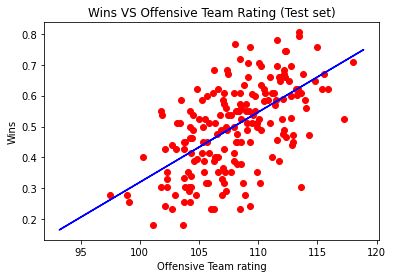

In [ ]:
# Visualizing the Test set results
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Wins VS Offensive Team Rating (Test set)')
plt.xlabel('Offensive Team rating')
plt.ylabel('Wins')
plt.show()

##Predictions 
With our model, we can predict that a team with a 100 offensive rating would win about 32% of their games in a season while a team with a 115 offensive rating would win 66% of their games in a season.


In [ ]:
#Prediction for team with 100  Team Offensive rating
pred_win = -1.9482172557770767 + 0.02268099*(100)
print(pred_win)

#Prediction for a team with a 115 Team Offensive Rating
pred_win_2 = -1.9482172557770767 + 0.02268099*(115)
print(pred_win_2)

0.3198817442229236
0.6600965942229233


##Residual Graph
In order to make valid inferences from our regression, the residuals of the regression should follow a normal distribution. Clearly our residual graph shows a normal distribution of the error term. This means that our estimates are valid and true.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


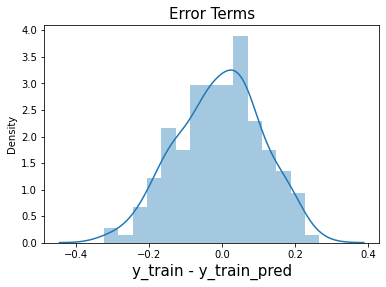

In [ ]:
# Creating residuals from the y_train data and predicted y_data
res = (y_test - y_pred)

fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

#Deployment

When it comes to basketball, NBA teams understand that a dominant offense is the key to team success. When teams have an efficient offense, they can score points in bunches and create a larger margin of error on the defensive end. Offensive rating measures a team’s total offensive efficiency, taking into account all of the possessions that a team has to work with. On the other hand, defensive rating is a measure of a team’s defensive efficiency, taking into account all of the possessions that a team has to defend against. 

The research provided in this project concluded that teams are devoted to having a high offensive rating because it gives them the best chance to win games. A team with a high offensive rating is usually able to establish a lead in the game and then maintain it by scoring points with ease. It also opens up opportunities for transition plays and fast breaks that can put points up on the board quickly and efficiently. The ability to score points quickly can also mean that a team does not have to rely on long possessions and can instead capitalize on shorter ones to rack up points. The data revealed that teams who run a surperior offense are almost always one of the best teams in the NBA.

In contrast, NBA teams do not generally care about having a low defensive rating. While having a great defensive rating may reduce the amount of points that the opposition scores, it does not always guarantee victory. It is very possible for a team to win games despite having a poor defensive rating. This is because a team can still score more points than the opposition, even if they do not defend as well. Ultimately, it is clear that offense is more important to NBA teams than defense, as a high offensive rating gives them the best chance of winning games, while a higher defensive rating coincides with a lower Win/Loss percentage.